In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
src_dir = '../tests/resources/huge_dataset'
orderbooks_src = f'{src_dir}/orderbook_10_03_20.csv.gz'
trades_src = f'{src_dir}/trades_10_03_20.csv.gz'

orderbooks = pd.read_csv(orderbooks_src, header=None, nrows=60000)
orderbooks = orderbooks[[0, 1, 2, 3, 13, 23, 33]] # L1
orderbooks[0] = pd.to_datetime(orderbooks[0])
orderbooks[1] = orderbooks[1].apply(lambda x: datetime.timedelta(milliseconds=x))
orderbooks[0] = orderbooks[0] + orderbooks[1]
orderbooks = orderbooks.drop(columns=[1])
orderbooks.columns = ['timestamp', 'symbol', 'ask-price', 'ask-volume', 'bid-price', 'bid-volume']

In [3]:
trades = pd.read_csv(trades_src, header=None, nrows=10000)
trades[1] = pd.to_datetime(trades[1])
trades[2] = trades[2].apply(lambda x: datetime.timedelta(milliseconds=x))
trades[1] = trades[1] + trades[2]
trades = trades.drop(columns=[2, 5])
trades.columns = ['symbol', 'timestamp', 'price', 'volume', 'side']

In [9]:
t = pd.DatetimeIndex(orderbooks['timestamp'])
orderbooks = orderbooks.set_index(t)
# len(t.values)

In [17]:
t[:10]

DatetimeIndex(['2020-03-10 18:25:10.984000', '2020-03-10 18:25:10.811000',
               '2020-03-10 18:25:11.070000', '2020-03-10 18:25:11.075000',
               '2020-03-10 18:25:11.082000', '2020-03-10 18:25:11.155000',
               '2020-03-10 18:25:11.214000', '2020-03-10 18:25:11.259000',
               '2020-03-10 18:25:11.320000', '2020-03-10 18:25:11.334000'],
              dtype='datetime64[ns]', name='timestamp', freq=None)

In [22]:
tmp = orderbooks.sort_index().truncate(before='2020-03-10 18:25:12')
tmp2 = orderbooks.sort_index().truncate(after='2020-03-10 18:25:12')

In [23]:
tmp2

,timestamp,symbol,ask-price,ask-volume,bid-price,bid-volume
timestamp,,,,,,
2020-03-10 18:25:10.811,2020-03-10 18:25:10.811,ETHUSD,199.05,237689,199.0,80923
2020-03-10 18:25:10.984,2020-03-10 18:25:10.984,XBTUSD,7823.00,1448760,7822.5,347116
2020-03-10 18:25:11.070,2020-03-10 18:25:11.070,ETHUSD,199.05,239889,199.0,80923
2020-03-10 18:25:11.075,2020-03-10 18:25:11.075,ETHUSD,199.05,241489,199.0,80923
2020-03-10 18:25:11.082,2020-03-10 18:25:11.082,ETHUSD,199.05,243489,199.0,80923
2020-03-10 18:25:11.155,2020-03-10 18:25:11.155,ETHUSD,199.05,243489,199.0,82923
2020-03-10 18:25:11.214,2020-03-10 18:25:11.214,ETHUSD,199.05,243489,199.0,84381
2020-03-10 18:25:11.259,2020-03-10 18:25:11.259,XBTUSD,7823.00,1448760,7822.5,347116
2020-03-10 18:25:11.320,2020-03-10 18:25:11.320,ETHUSD,199.05,243489,199.0,82923


In [6]:
t.first('3m')

AttributeError: 'DatetimeIndex' object has no attribute 'first'

In [108]:
xbt_ob = orderbooks[orderbooks['symbol'] == 'XBTUSD']
xbt_tr = trades[trades['symbol'] == 'XBTUSD']

xbt_sell = xbt_tr[xbt_tr['side'] == 'Sell']
xbt_buy = xbt_tr[xbt_tr['side'] == 'Buy']


eth_ob = orderbooks[orderbooks['symbol'] == 'ETHUSD']
eth_tr = trades[trades['symbol'] == 'ETHUSD']


eth_sell = eth_tr[eth_tr['side'] == 'Sell']
eth_buy = eth_tr[eth_tr['side'] == 'Buy']

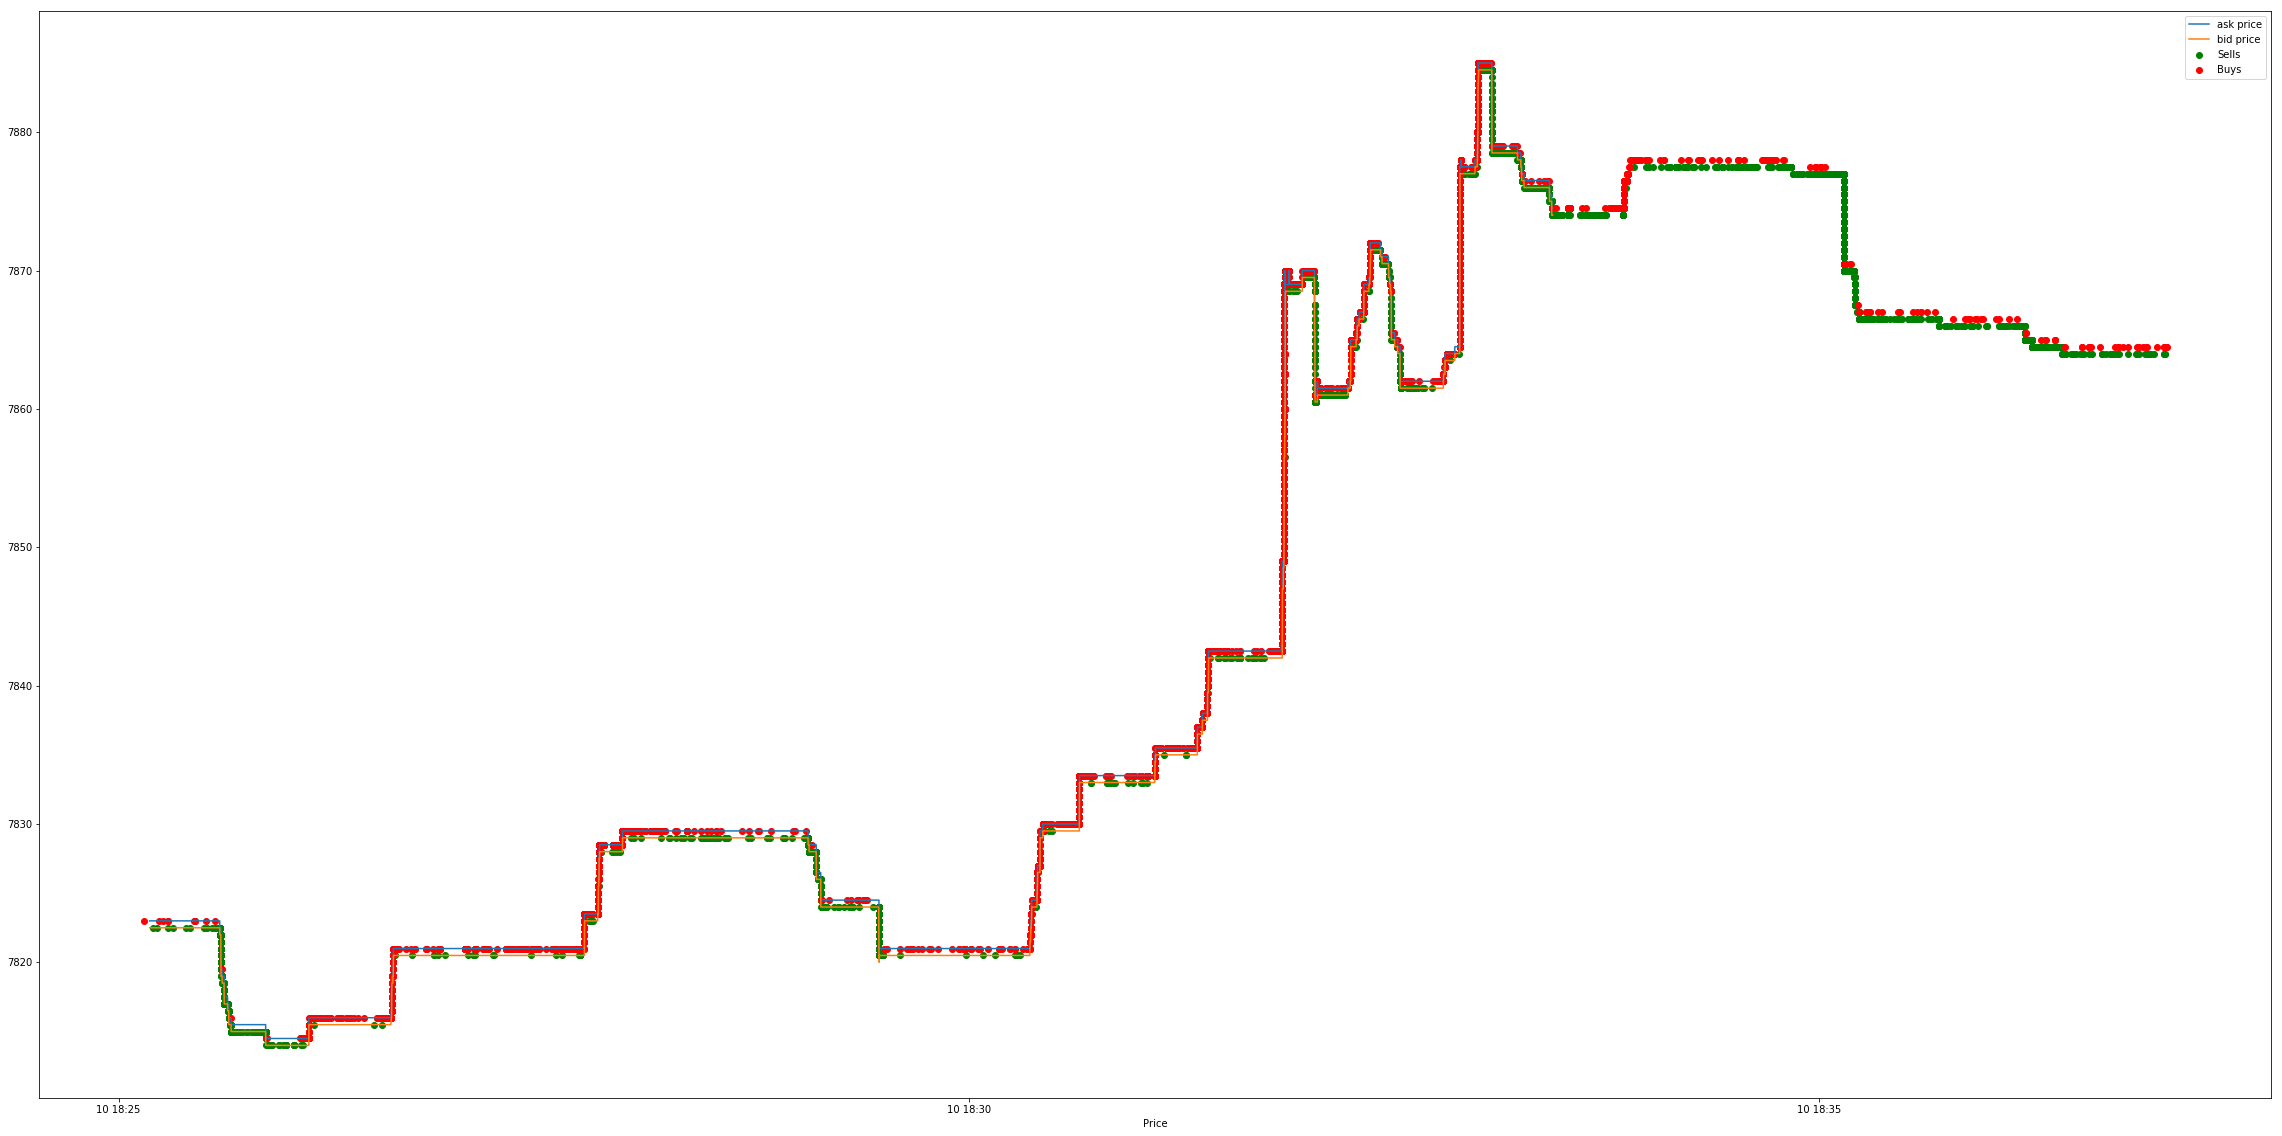

In [109]:
plt.figure(figsize=(40,20))

plt.xlabel('Time')
plt.xlabel('Price')
plt.plot(xbt_ob['timestamp'], xbt_ob['ask-price'], label='ask price')
plt.plot(xbt_ob['timestamp'], xbt_ob['bid-price'], label='bid price')
plt.scatter(xbt_sell['timestamp'], xbt_sell['price'], label='Sells', c='g')
plt.scatter(xbt_buy['timestamp'], xbt_buy['price'], label='Buys', c='r')
plt.legend()

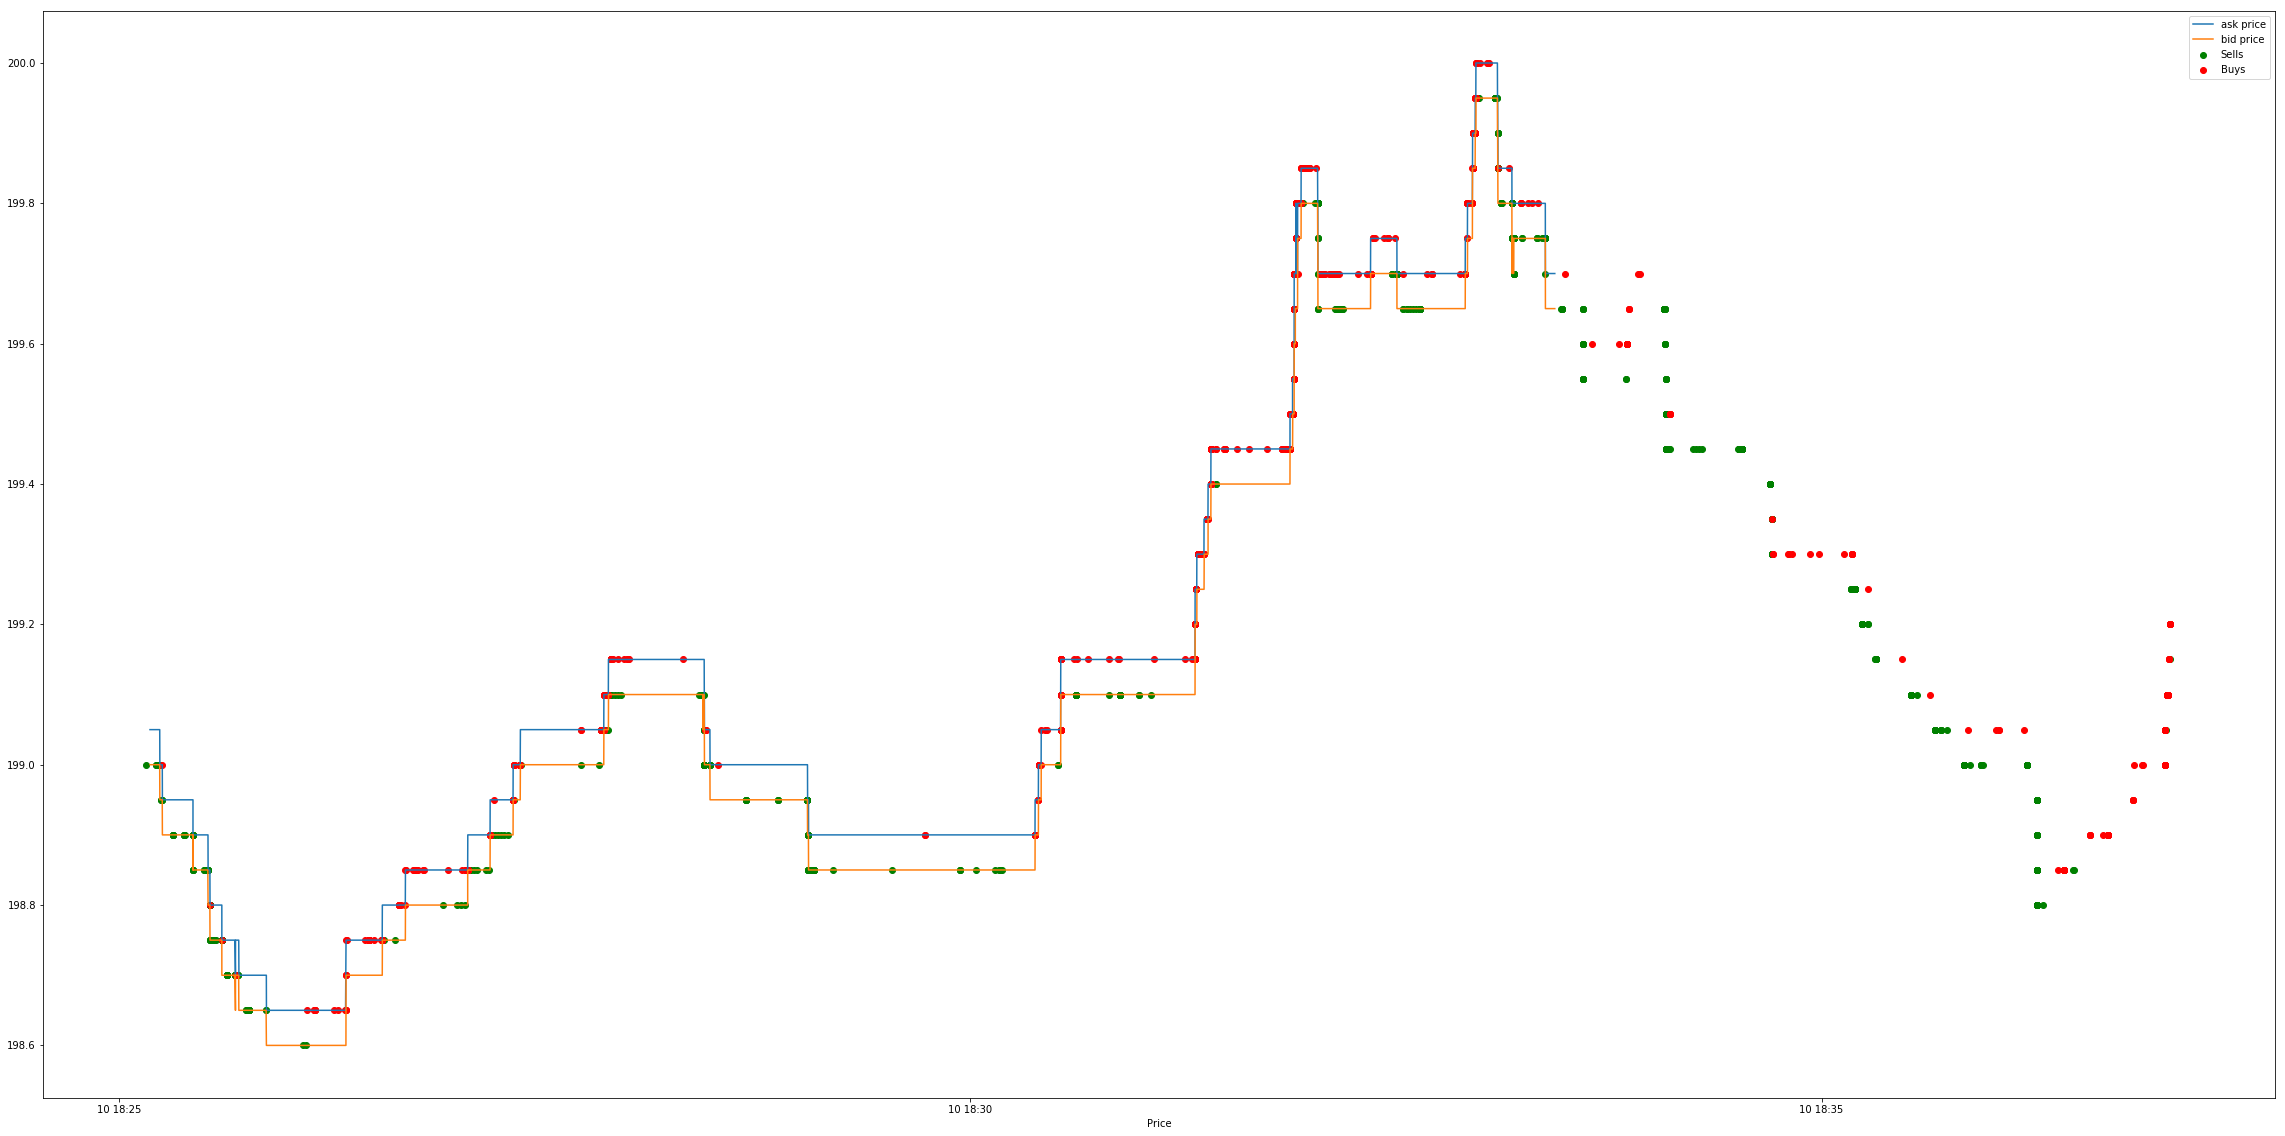

In [110]:
plt.figure(figsize=(40,20))

plt.xlabel('Time')
plt.xlabel('Price')
plt.plot(eth_ob['timestamp'], eth_ob['ask-price'], label='ask price')
plt.plot(eth_ob['timestamp'], eth_ob['bid-price'], label='bid price')
plt.scatter(eth_sell['timestamp'], eth_sell['price'], label='Sells', c='g')
plt.scatter(eth_buy['timestamp'], eth_buy['price'], label='Buys', c='r')
plt.legend()